In [2]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp39-cp39-win_amd64.whl (153 kB)


In [3]:
import re
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\adira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# for other theme, please run: mpl.pyplot.style.available
PLOT_PALETTE = 'tableau-colorblind10'
# for other color map, please run: mpl.pyplot.colormaps()
WORDCLOUD_COLOR_MAP = 'tab10_r'

In [5]:
# set palette color
plt.style.use(PLOT_PALETTE)
%matplotlib inline

In [6]:
#df = pd.read_csv('../input/resume-dataset/Resume/Resume.csv')
df = pd.read_csv('D:/Resume.csv')

df.head()

ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR

In [7]:
# drop unused columns
del df['ID']
del df['Resume_html']
df

Resume_str  Category
0              HR ADMINISTRATOR/MARKETING ASSOCIATE\...        HR
1              HR SPECIALIST, US HR OPERATIONS      ...        HR
2              HR DIRECTOR       Summary      Over 2...        HR
3              HR SPECIALIST       Summary    Dedica...        HR
4              HR MANAGER         Skill Highlights  ...        HR
...                                                 ...       ...
2479           RANK: SGT/E-5 NON- COMMISSIONED OFFIC...  AVIATION
2480           GOVERNMENT RELATIONS, COMMUNICATIONS ...  AVIATION
2481           GEEK SQUAD AGENT         Professional...  AVIATION
2482           PROGRAM DIRECTOR / OFFICE MANAGER    ...  AVIATION
2483           STOREKEEPER II       Professional Sum...  AVIATION

[2484 rows x 2 columns]

In [8]:
def preprocess(txt):
    # convert all characters in the string to lower case
    txt = txt.lower()
    # remove non-english characters, punctuation and numbers
    txt = re.sub('[^a-zA-Z]', ' ', txt)
    txt = re.sub('http\S+\s*', ' ', txt)  # remove URLs
    txt = re.sub('RT|cc', ' ', txt)  # remove RT and cc
    txt = re.sub('#\S+', '', txt)  # remove hashtags
    txt = re.sub('@\S+', '  ', txt)  # remove mentions
    txt = re.sub('\s+', ' ', txt)  # remove extra whitespace
    # tokenize word
    txt = nltk.tokenize.word_tokenize(txt)
    # remove stop words
    txt = [w for w in txt if not w in nltk.corpus.stopwords.words('english')]
    

    return ' '.join(txt)

In [10]:
# preprocessing text
df['Resume_str'] = df['Resume_str'].apply(lambda w: preprocess(w))

In [11]:
import string
from nltk.corpus import stopwords
oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = df['Resume_str'].values
cleanedSentences = ""
for records in Sentences:
    cleanedSentences += records
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

[('state', 16159), ('company', 15212), ('city', 15077), ('management', 12174), ('name', 11739), ('sales', 8275), ('customer', 7927), ('business', 7866), ('skills', 7729), ('new', 6409), ('service', 6223), ('team', 6073), ('development', 5731), ('training', 5637), ('experience', 5632), ('project', 5362), ('work', 4817), ('manager', 4534), ('information', 4502), ('marketing', 4489), ('financial', 4227), ('office', 4189), ('support', 4123), ('education', 4093), ('including', 4045), ('staff', 3950), ('professional', 3857), ('data', 3797), ('system', 3697), ('systems', 3559), ('university', 3477), ('managed', 3432), ('process', 3428), ('customers', 3418), ('design', 3384), ('quality', 3367), ('client', 3272), ('clients', 3244), ('developed', 3228), ('reports', 3090), ('analysis', 3052), ('operations', 3008), ('product', 2951), ('high', 2950), ('program', 2934), ('services', 2847), ('ounting', 2843), ('microsoft', 2830), ('current', 2787), ('ounts', 2782)]


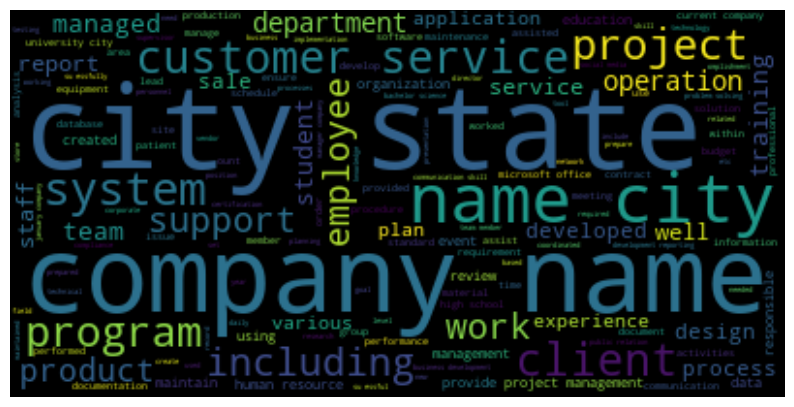

In [12]:
wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
# create list of all categories
categories = np.sort(df['Category'].unique())
categories

array(['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS',
       'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT',
       'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA',
       'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR',
       'INFORMATION-TECHNOLOGY', 'PUBLIC-RELATIONS', 'SALES', 'TEACHER'],
      dtype=object)

In [16]:
# create new df for corpus and category
df_categories = [df[df['Category'] == category].loc[:, ['Resume_str', 'Category']] for category in categories]
df_categories

[                                             Resume_str    Category
 1808  ountant professional summary current ountant c...  ACCOUNTANT
 1809  ountant summary innovative energetic ountant p...  ACCOUNTANT
 1810  ountant highlights microsoft office intermedia...  ACCOUNTANT
 1811  ountant professional summary inpatient outpati...  ACCOUNTANT
 1812  ountant summary pursue excellence dynamic busi...  ACCOUNTANT
 ...                                                 ...         ...
 1921  general ountant professional summary around ye...  ACCOUNTANT
 1922  staff ountant professional summary currently g...  ACCOUNTANT
 1923  general ountant summary years experienced prof...  ACCOUNTANT
 1924  project ountant career focus dedicated focused...  ACCOUNTANT
 1925  senior ountant summary highly competent motiva...  ACCOUNTANT
 
 [118 rows x 2 columns],
                                             Resume_str  Category
 439  advocate professional summary conscientious at...  ADVOCATE
 440  advocat

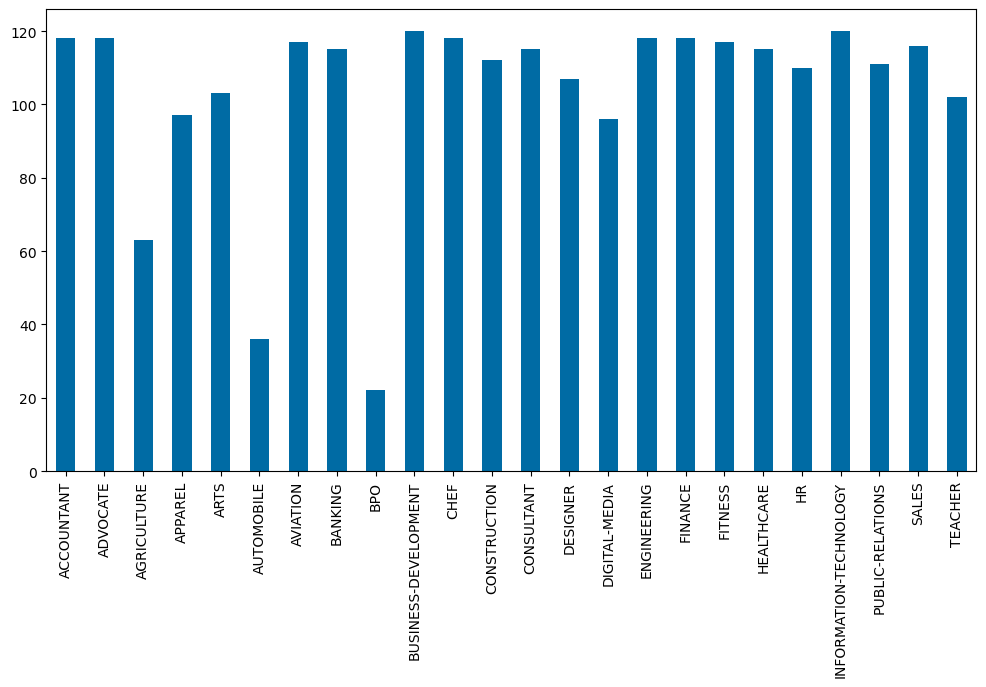

In [17]:
df['Category'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6))
plt.show()

In [20]:
def wordcloud(df):
    txt = ' '.join(txt for txt in df['Resume_str'])
    wordcloud = WordCloud(
        height=2000,
        width=4000,
        colormap=WORDCLOUD_COLOR_MAP
    ).generate(txt)

    return wordcloud

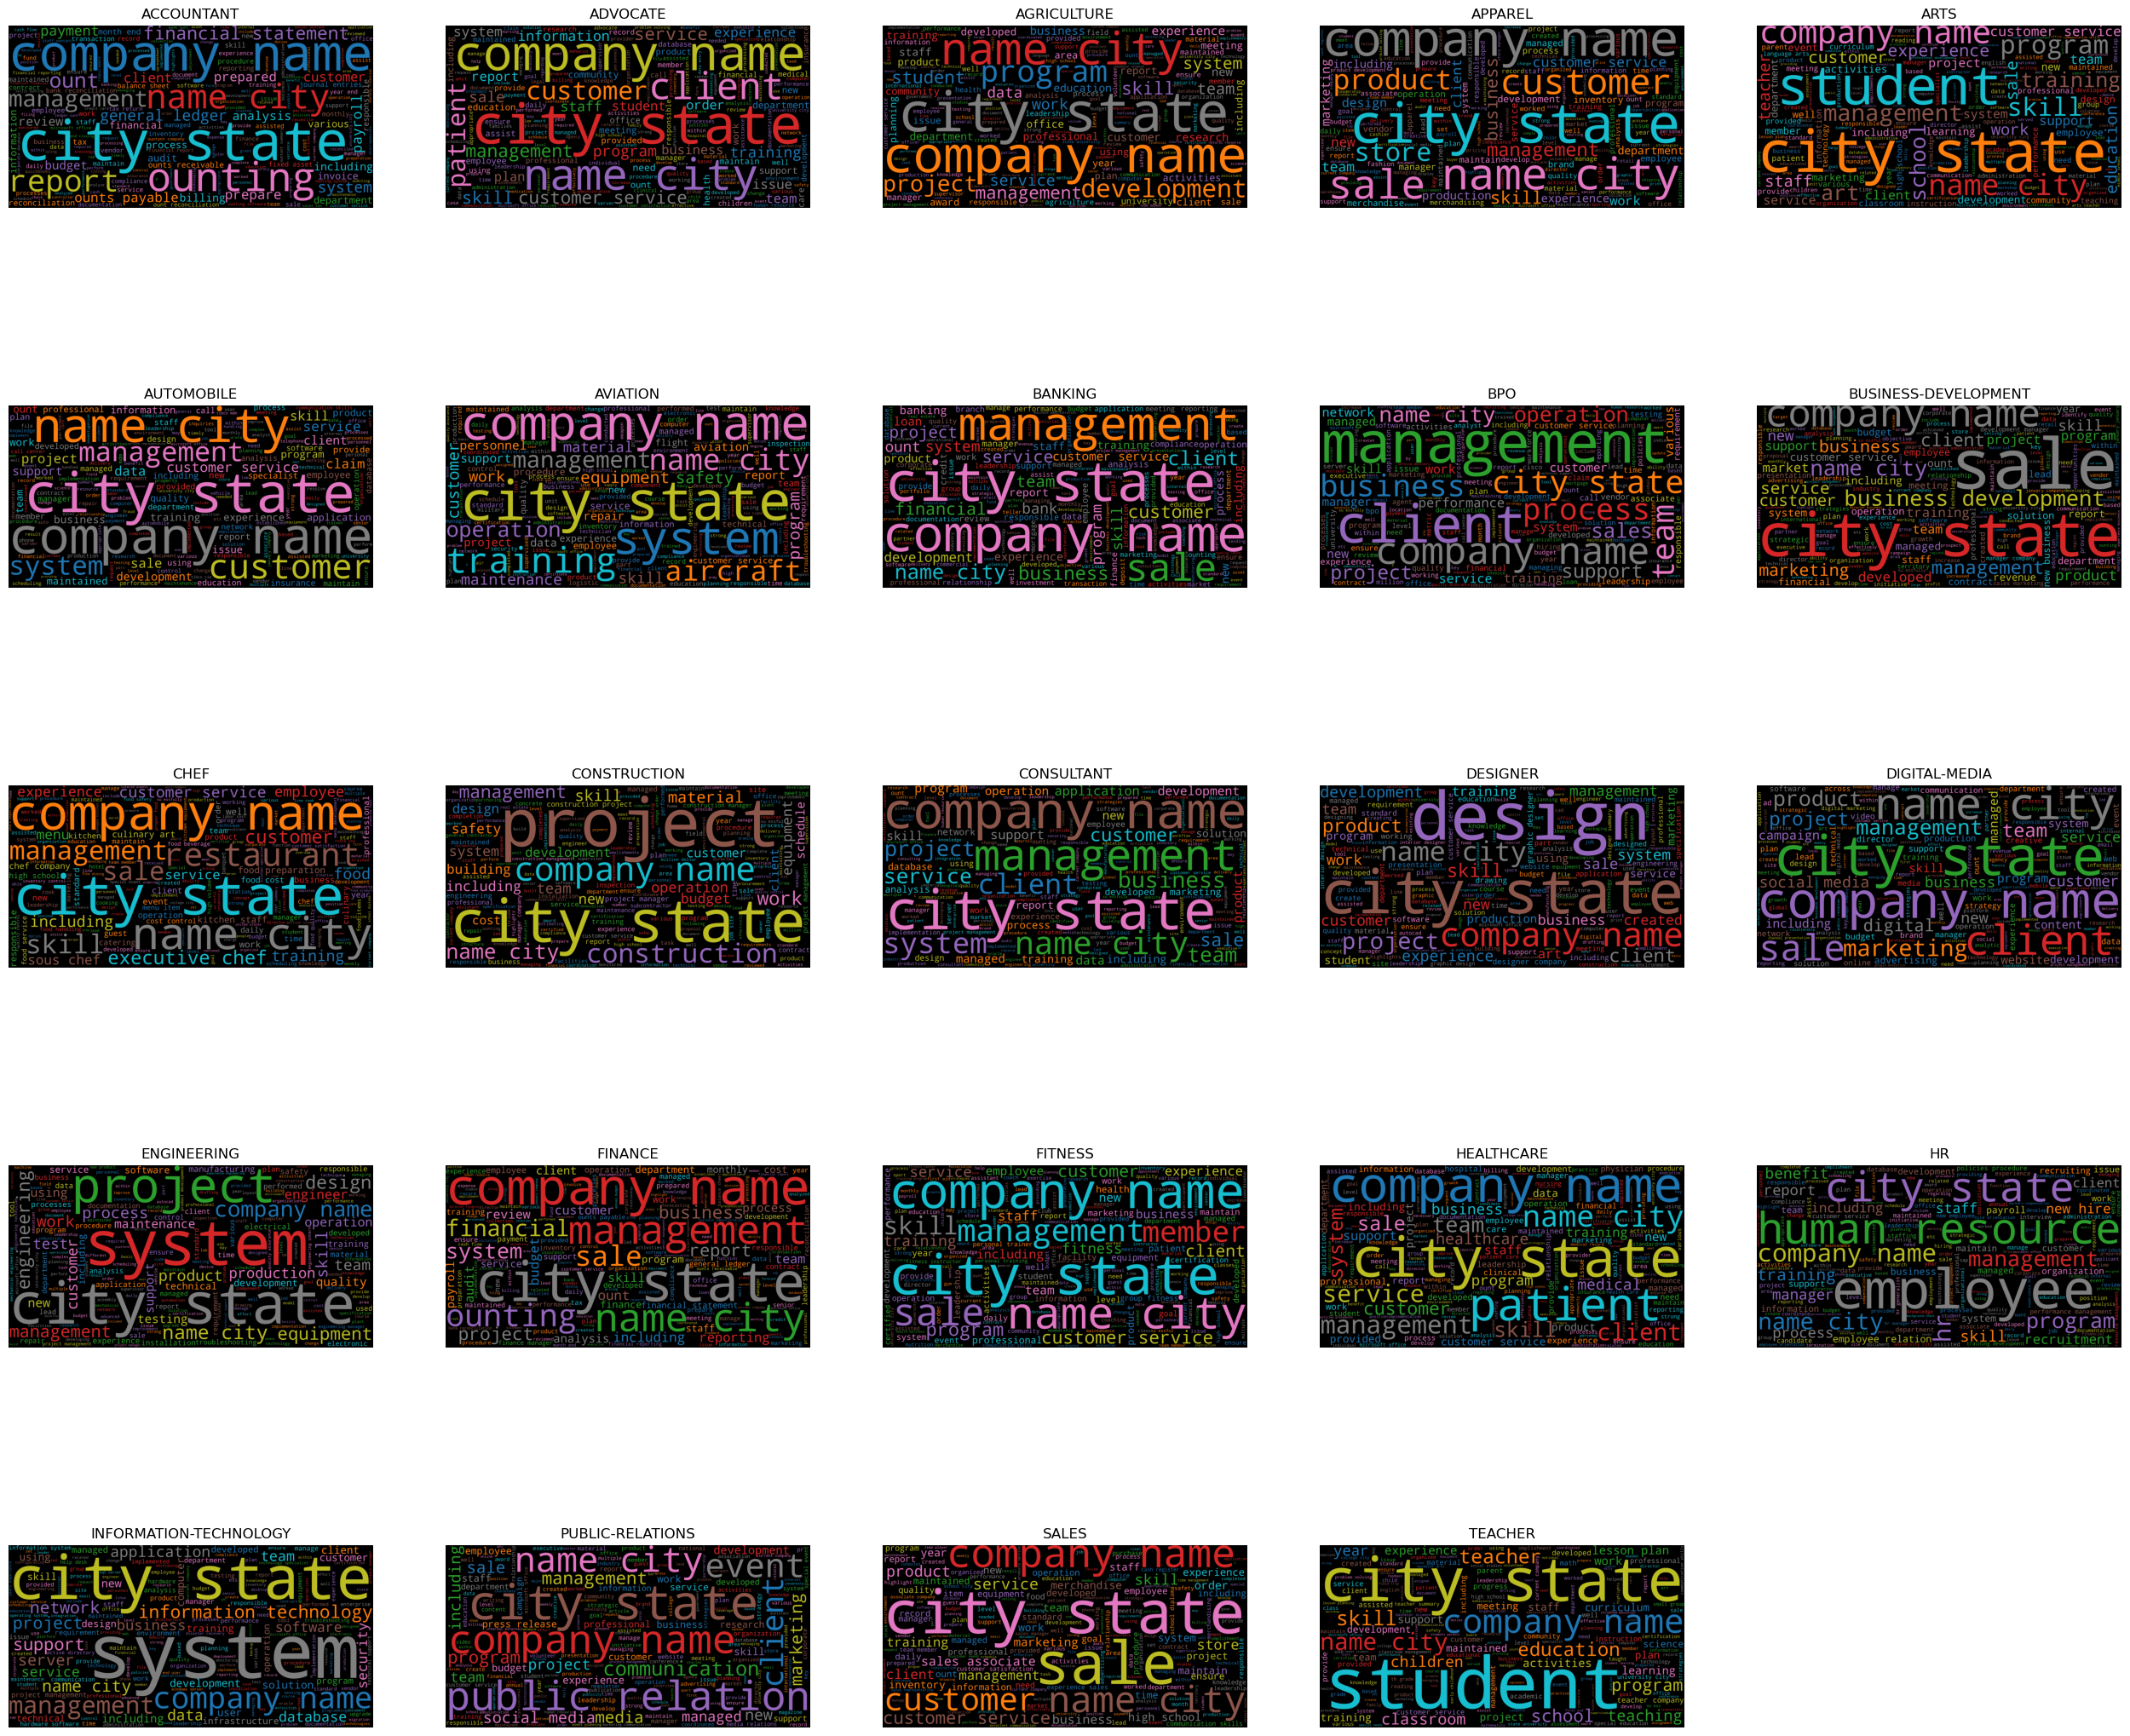

In [21]:
plt.figure(figsize=(32, 28))

for i, category in enumerate(categories):
    wc = wordcloud(df_categories[i])

    plt.subplot(5, 5, i + 1).set_title(category)
    plt.imshow(wc)
    plt.axis('off')
    plt.plot()

plt.show()
plt.close()

In [22]:
def wordfreq(df):
    count = df['Resume_str'].str.split(expand=True).stack().value_counts().reset_index()
    count.columns = ['Word', 'Frequency']

    return count.head(10)

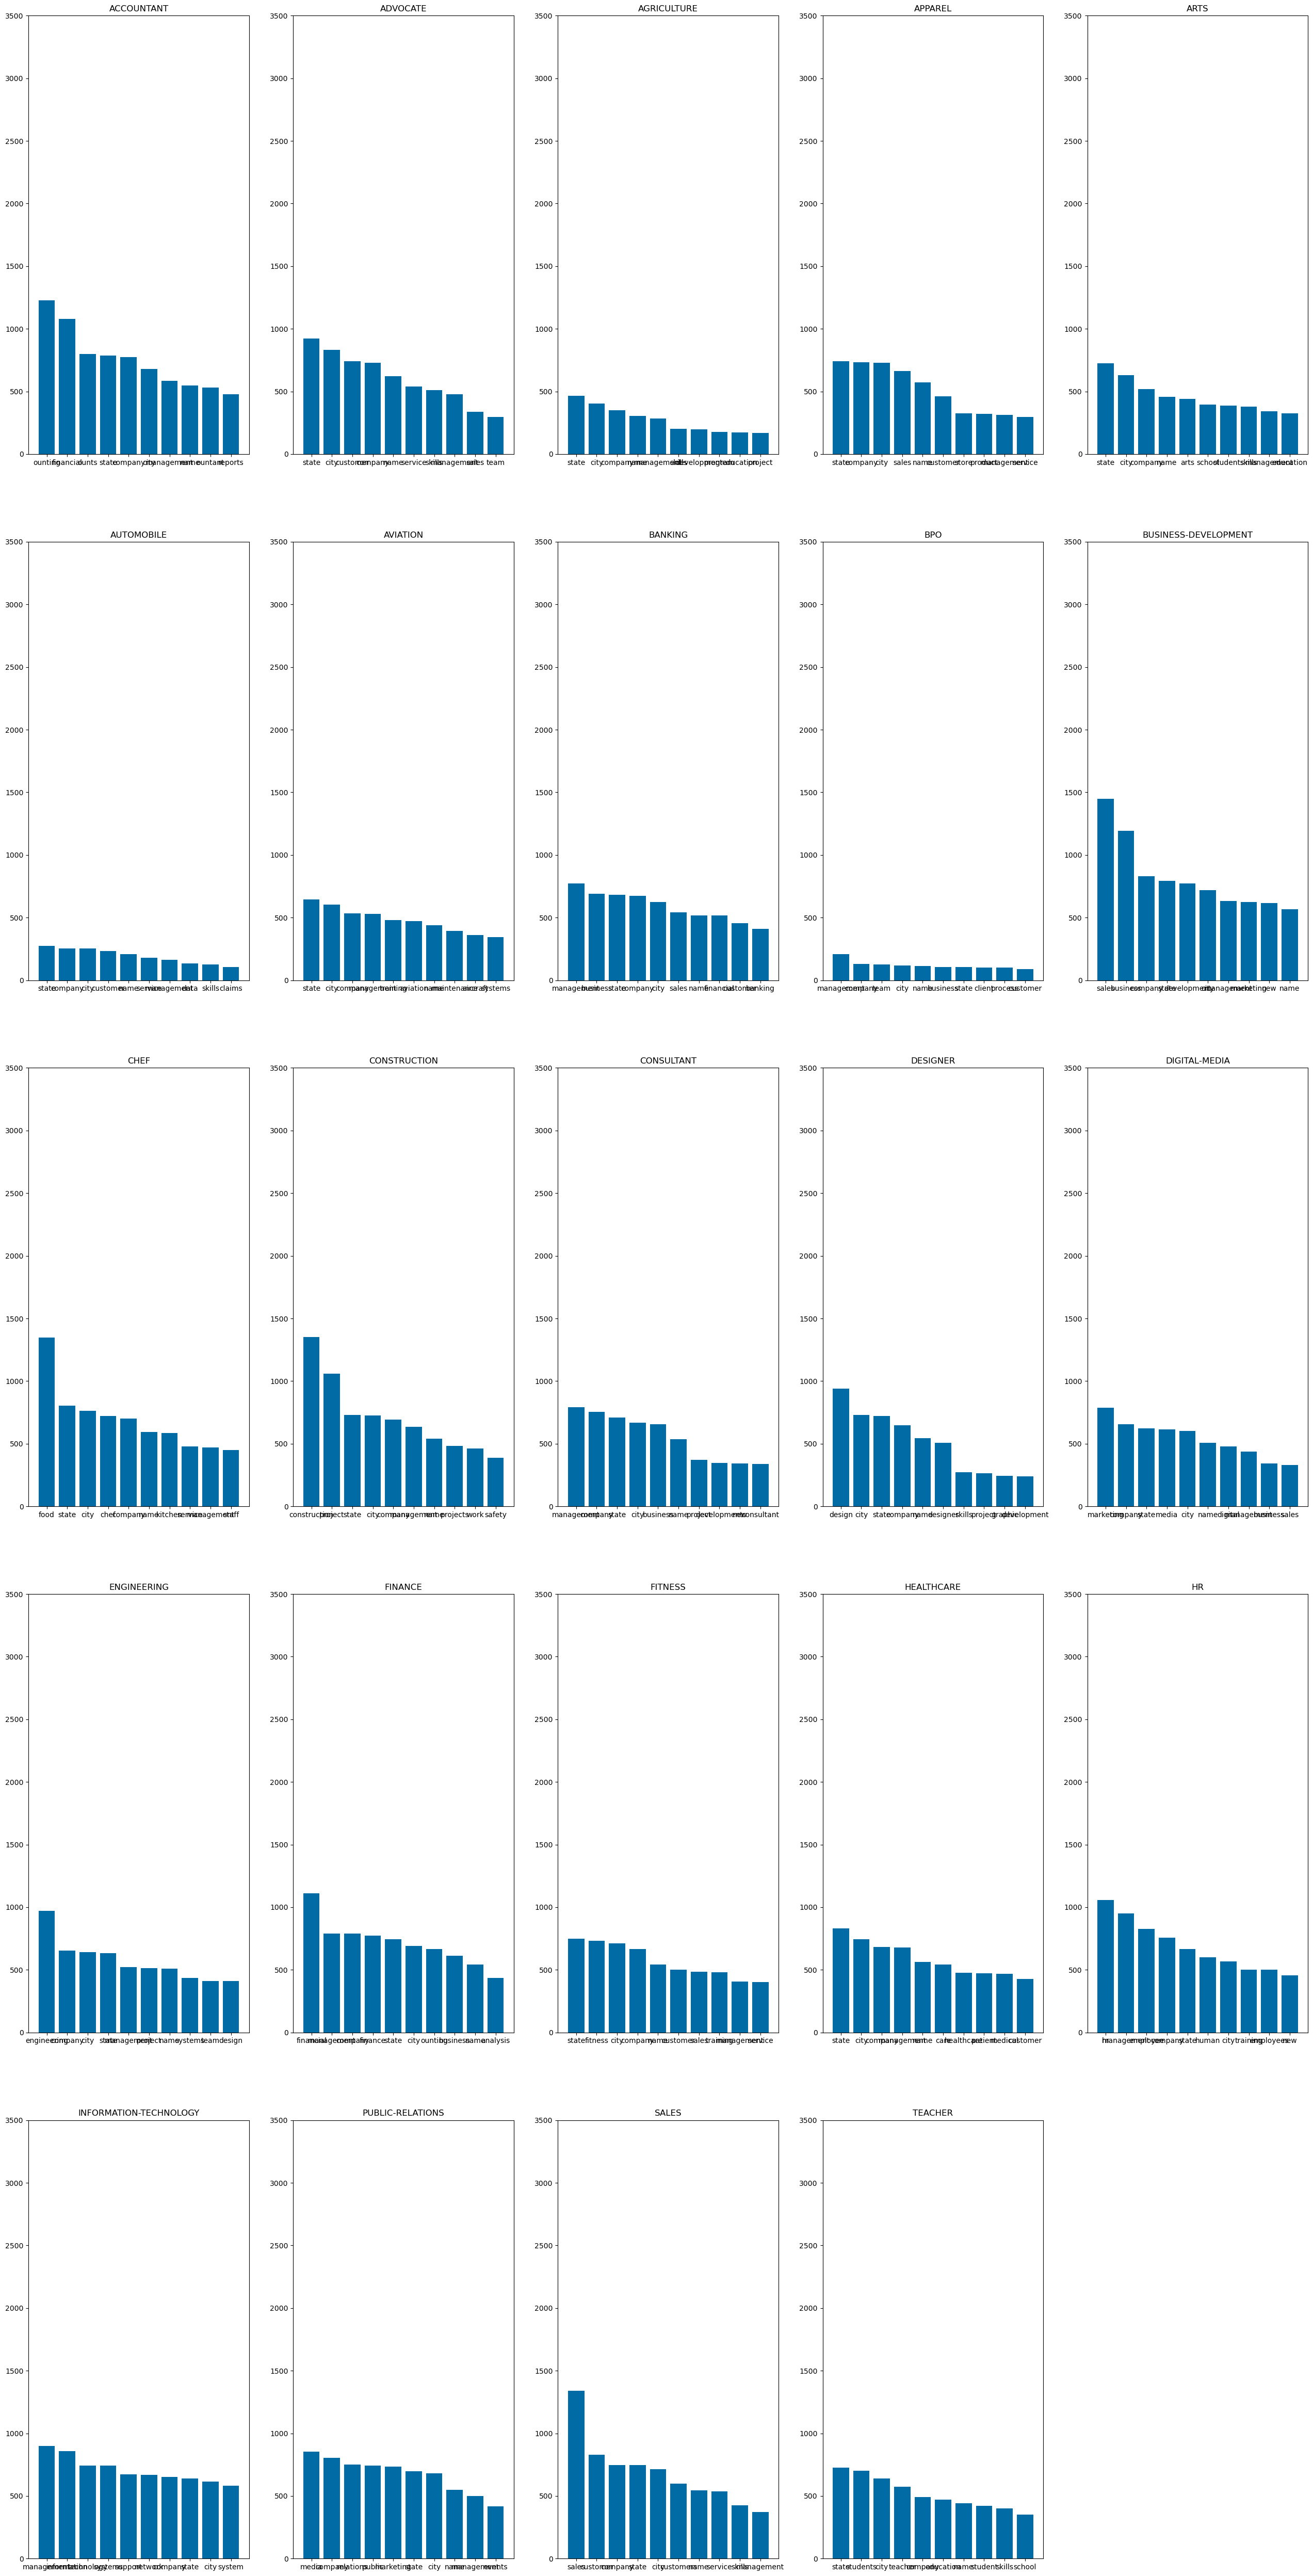

In [23]:
fig = plt.figure(figsize=(32, 64))

for i, category in enumerate(categories):
    wf = wordfreq(df_categories[i])

    fig.add_subplot(5, 5, i + 1).set_title(category)
    plt.bar(wf['Word'], wf['Frequency'])
    plt.ylim(0, 3500)

plt.show()
plt.close()


In [24]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [25]:
df

Resume_str  Category
0     hr administrator marketing associate hr admini...        19
1     hr specialist us hr operations summary versati...        19
2     hr director summary years experience recruitin...        19
3     hr specialist summary dedicated driven dynamic...        19
4     hr manager skill highlights hr skills hr depar...        19
...                                                 ...       ...
2479  rank sgt e non commissioned officer charge bri...         6
2480  government relations communications organizati...         6
2481  geek squad agent professional profile support ...         6
2482  program director office manager summary highly...         6
2483  storekeeper ii professional summary purpose do...         6

[2484 rows x 2 columns]

In [26]:
df.Category.value_counts()

20    120
9     120
16    118
1     118
0     118
15    118
10    118
6     117
17    117
22    116
7     115
18    115
12    115
11    112
21    111
19    110
13    107
4     103
23    102
3      97
14     96
2      63
5      36
8      22
Name: Category, dtype: int64

In [27]:
#Remove Category with a few records (implanced data)
df = df[df.Category != 2]
df = df[df.Category != 5]
df = df[df.Category != 8]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = df['Resume_str'].values
requiredTarget = df['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print ("Feature completed .....")

Feature completed .....


In [30]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,requiredTarget,random_state=42, test_size=0.2,
                                                 shuffle=True, stratify=requiredTarget)
print(X_train.shape)
print(X_test.shape)

(1890, 35860)
(473, 35860)


In [31]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print('Accuracy of KNeighbors Classifier on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('Accuracy of KNeighbors Classifier on test set:     {:.2f}'.format(clf.score(X_test, y_test)))

Accuracy of KNeighbors Classifier on training set: 0.68
Accuracy of KNeighbors Classifier on test set:     0.52


In [32]:
print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))


 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       0.56      0.58      0.57        24
           1       0.62      0.21      0.31        24
           3       0.33      0.11      0.16        19
           4       0.12      0.10      0.11        21
           6       0.87      0.54      0.67        24
           7       0.73      0.48      0.58        23
           9       0.30      0.58      0.39        24
          10       0.85      0.71      0.77        24
          11       0.68      0.68      0.68        22
          12       0.08      0.04      0.06        23
          13       0.72      0.62      0.67        21
          14       0.70      0.74      0.72        19
          15       0.79      0.62      0.70        24
          16       0.61      0.58      0.60        24
          17       0.70      0.30      0.42        23
          18       0.42      0.57      0.